## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [3]:
#read house data
house = pd.read_csv('house-prices/Data/train.csv')

In [4]:
#display all info
pd.set_option('display.max_row',None)
pd.set_option('display.max_column',None)

In [5]:
#check data's head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house['BldgType'].unique()
# BldgType: Type of dwelling
#        1Fam	Single-family Detached	
#        2FmCon	Two-family Conversion; originally built as one-family dwelling
#        Duplx	Duplex
#        TwnhsE	Townhouse End Unit
#        TwnhsI	Townhouse Inside Unit

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [7]:
#distribution of type of dwelling / BldgType
t_BldgType_distribution = house['BldgType'].value_counts()
t_BldgType_distribution

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

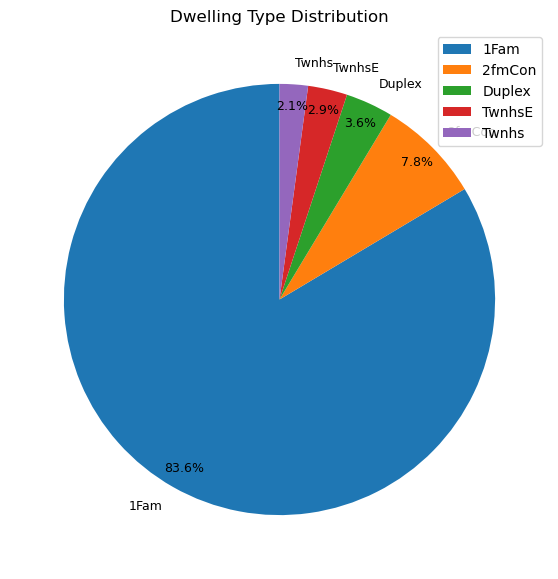

In [8]:
# create pie chart to show the distribution of dwelling type
labels = ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
plt.figure(figsize=(7,7))  # set image size
plt.pie(t_BldgType_distribution,  
        labels=labels,    # put labels
        autopct='%1.1f%%',   # add percentage
        startangle=90,      
        textprops={'fontsize':9},
        pctdistance=0.9        # set percentage distance from circle center
       )
plt.legend(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],loc='best')
plt.title('Dwelling Type Distribution')
plt.show()

## 2. Linear Relation Analysis 
###      between GrLivArea(Above ground living area square feet) and SalePrice

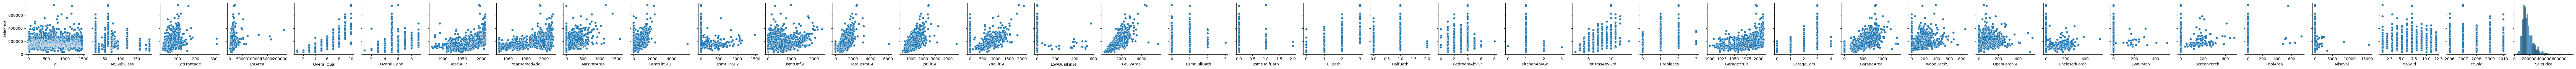

In [9]:
# check is any variable has a linear relationship with SalePrice
sns.pairplot(house,y_vars='SalePrice')

In [10]:
house['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [11]:
# select explanary variable and dependent variable
x = house[['GrLivArea']]
y = house['SalePrice']

# create and fit the linear regression model
model = LinearRegression()
model.fit(x,y)

#get coefficients
slope = model.coef_
intercept = model.intercept_

print(f'Linear Equation: SalePrice = {slope[0]:.2f} * GrLivArea + {intercept:.2f}')

Linear Equation: SalePrice = 107.13 * GrLivArea + 18569.03


In [12]:
# GrLivArea,Above ground living area square feet
# get the corr of GrLivArea and SalePrice
house['GrLivArea'].corr(house['SalePrice'])

0.7086244776126522

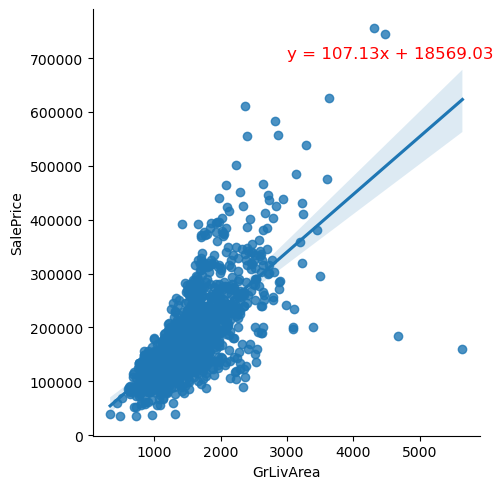

In [13]:
#Scatter plot
sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = house, fit_reg = True, palette = "Set1")

equation = f'y = {slope[0]:.2f}x + {intercept:.2f}'

# Add the linear equation as a text annotation on the plot
plt.annotate(equation, xy=(3000,700000), fontsize=12, color='red')

# Show the plot
plt.show()

## 3. Chi-Square Analysis
### CentralAir with PavedDrive

In [42]:
# PavedDrive: Paved driveway
#        Y	Paved;
#        P	Partial Pavement;
#        N	Dirt/Gravel;
       
# CentralAir: Central air conditioning
#        N	No;   
#        Y	Yes;

table_CentralAir_PavedDrive = pd.crosstab(house['CentralAir'],house['PavedDrive'])
table_CentralAir_PavedDrive

PavedDrive,N,P,Y
CentralAir,,,
N,34,6,55
Y,56,24,1285


In [43]:
# Calculate percentages
percentage_table = table_CentralAir_PavedDrive.apply(lambda r: r / r.sum(), axis=1) * 100
percentage_table

PavedDrive,N,P,Y
CentralAir,,,
N,35.789474,6.315789,57.894737
Y,4.102564,1.758242,94.139194


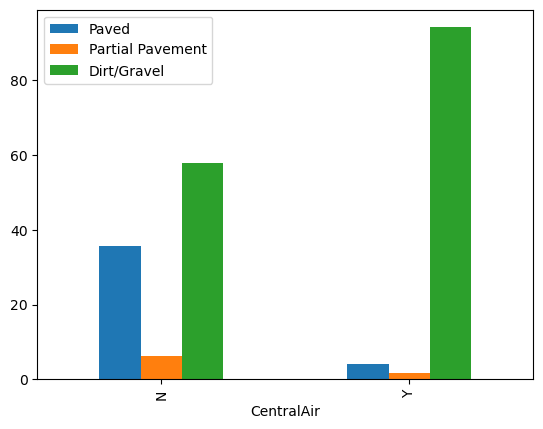

In [41]:
percentage_table.plot(kind='bar',stacked=False)
plt.xlabel = 'CentralAir'
plt.ylabel = 'Count'
plt.title = 'PavedDrive by CentralAir'
plt.legend(labels = ['Paved','Partial Pavement','Dirt/Gravel'])
plt.show()

In [44]:
chi2,p,df,ef = chi2_contingency(table_CentralAir_PavedDrive)

In [45]:
p

7.508132927971213e-37